In [2]:
import pandas
import seaborn as sns
from sklearn.linear_model import LinearRegression

pandas.options.display.max_columns = None
pandas.options.display.max_rows = None

fifa = pandas.read_csv("FIFA22_official_data.csv")
fifa.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,https://cdn.sofifa.com/players/212/198/22_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.com/teams/11/30.png,€107.5M,€250K,2341,Right,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",NaN,2025,179cm,69kg,87.0,83.0,64.0,91.0,87.0,83.0,87.0,87.0,88.0,87.0,77.0,73.0,80.0,91.0,79.0,89.0,73.0,91.0,70.0,89.0,78.0,66.0,87.0,90.0,91.0,87.0,NaN,73.0,65.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€206.9M,72.0
1,209658,L. Goretzka,26,https://cdn.sofifa.com/players/209/658/22_60.png,Germany,https://cdn.sofifa.com/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.com/teams/21/30.png,€93M,€140K,2314,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos11"">LDM",8.0,"Jul 1, 2018",NaN,2026,189cm,82kg,75.0,82.0,86.0,86.0,69.0,84.0,76.0,75.0,84.0,87.0,78.0,83.0,76.0,88.0,71.0,85.0,79.0,88.0,88.0,86.0,81.0,86.0,85.0,84.0,60.0,82.0,NaN,85.0,77.0,13.0,8.0,15.0,11.0,9.0,CM,87.0,€160.4M,74.0
2,176580,L. Suárez,34,https://cdn.sofifa.com/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.com/teams/240/30.png,€44.5M,€135K,2307,Right,5.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",NaN,2022,182cm,83kg,80.0,93.0,84.0,83.0,90.0,83.0,86.0,82.0,77.0,86.0,76.0,69.0,75.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,87.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,€91.2M,42.0
3,192985,K. De Bruyne,30,https://cdn.sofifa.com/players/192/985/22_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/30.png,€125.5M,€350K,2304,Right,4.0,5.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM",17.0,"Aug 30, 2015",NaN,2025,181cm,70kg,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,91.0,76.0,76.0,79.0,91.0,78.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,83.0,89.0,NaN,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CM,91.0,€232.2M,68.0
4,224334,M. Acuña,29,https://cdn.sofifa.com/players/224/334/22_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.com/teams/481/30.png,€37M,€45K,2292,Left,2.0,3.0,4.0,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB",19.0,"Sep 14, 2020",NaN,2024,172cm,69kg,87.0,66.0,58.0,82.0,68.0,87.0,88.0,75.0,78.0,88.0,77.0,76.0,83.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,79.0,81.0,82.0,76.0,87.0,NaN,84.0,82.0,8.0,14.0,13.0,13.0,14.0,LB,84.0,€77.7M,80.0


In [2]:
for index, row in fifa.iterrows():
    
    Height = float(row["Height"].replace("cm",""))
    
Height

177.0

In [7]:
#What is the average overall rating of a player?

fifa['Best Overall Rating'].mean()

68.56540993417116

In [31]:
#What is the most common position for players in fifa?

fifa['Best Position'].mode()


0    CB
Name: Best Position, dtype: object

In [88]:
#Which team had the highest average overall rating of players in fifa?
team_ratings = fifa.groupby('Club')['Overall'].mean()

sorted_ratings = team_ratings.sort_values(ascending=False)
sorted_ratings


Club
111648                               87.000000
FC Anzhi Makhachkala                 79.000000
Siena                                79.000000
FC Bayern München                    78.848485
Juventus                             78.727273
Paris Saint-Germain                  78.585366
Manchester United                    78.048780
FC Krasnodar                         78.000000
Atlético de Madrid                   77.405405
Napoli                               77.222222
FC Barcelona                         77.025000
SL Benfica                           76.888889
Flamengo                             76.818182
Inter                                76.666667
Jiangsu FC                           76.500000
Sport Club Corinthians Paulista      76.285714
Chelsea                              76.166667
Liverpool                            76.142857
Real Madrid CF                       76.052632
Real Sociedad                        76.031250
Rubin Kazan                          76.000000
Clube At

In [69]:
#Which team has the most players with a rating higher than 88?

team_ratings = fifa.groupby('Club')['Overall'].apply(lambda x: (x > 88).sum())

most_players_with_high_rating = team_ratings.idxmax()

most_players_with_high_rating

'Liverpool'

In [51]:
team_ratings = fifa.groupby('Club')['Overall'].apply(lambda x: (x > 90).mean())

most_players_with_high_rating = team_ratings.idxmax()

most_players_with_high_rating

'Paris Saint-Germain'

<AxesSubplot: xlabel='Height'>

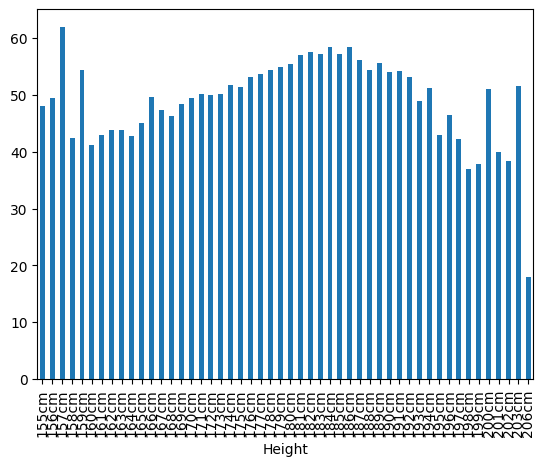

In [3]:
##Does a player's height give an advantage to headed goals?
height_groups = fifa.groupby('Height')['HeadingAccuracy'].mean()

height_groups.plot(kind='bar')

<AxesSubplot: xlabel='Height'>

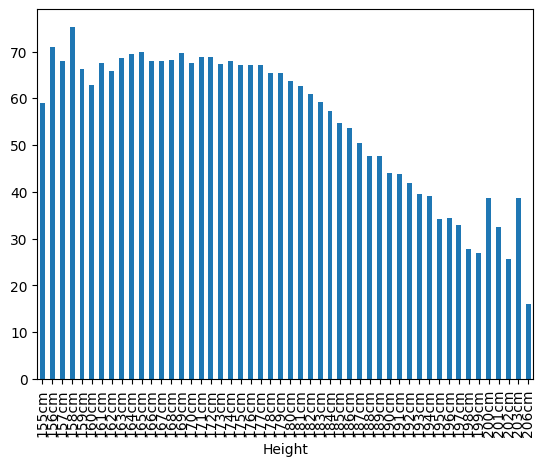

In [5]:
##Does a player's height affect his ball control?
height_groups = fifa.groupby('Height')['Dribbling'].mean()

height_groups.plot(kind='bar')